In [2]:
import sys
sys.path.insert(0, '../') 
import sphereGIS 
import datastructure
import numpy
import math
import shapely
import matplotlib.pyplot as plt
import geopandas

['Antigua and Barbuda', 'Aruba', 'Virgin Islands, U.S.', 'Trinidad and Tobago', 'Netherlands Antilles', 'Saint Vincent and the Grenadines', 'Grenada', 'Barbados', 'Saint Lucia', 'Saint Kitts and Nevis', 'Montserrat', 'Jamaica', 'Saint-Martin', 'Haiti', 'Guadeloupe', 'Venezuela', 'Puerto Rico', 'Dominican Republic', 'Anguilla', 'Cayman Islands', 'Turks and Caicos Islands', 'United States', 'Bahamas', 'Martinique', 'Colombia', 'Saint-Barthélemy', 'Cuba', 'Dominica', 'British Virgin Islands']


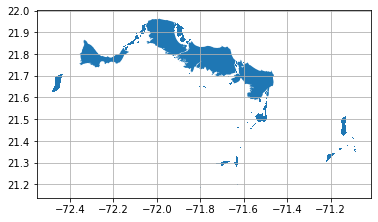

In [10]:
fig, ax = plt.subplots()
ax.grid(True)

caribbean = geopandas.read_file('data/caribbean.gpkg') 
names = list(caribbean['NAME_0'])
print(names)
polygons = caribbean[caribbean['NAME_0'] == 'Trinidad and Tobago']
polygons = caribbean[caribbean['NAME_0'] == names[20]] # 20, 25, 26

#polygons = geopandas.read_file('data/santa_barbara.gpkg') 

polygons.plot(ax=ax)

In [11]:
geom = polygons.iloc[0].geometry
polygon = datastructure.SphericalPolygon(geom)

In [ ]:
polygon.get_convex()

In [12]:
#convex_nodes = polygon.get_convex_indices()
#print(len(convex_nodes))
#convex_nodes

TypeError: 'LinearRing' object is not iterable

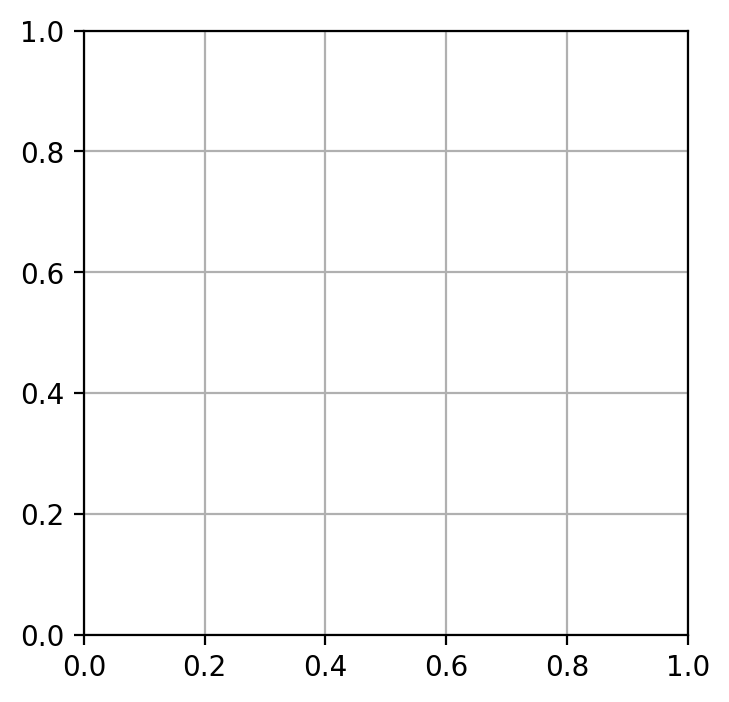

In [13]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

convex = polygon.convex_nodes.as_polygon_df()
convex.exterior.plot(ax=ax, color='b', linewidth=1, markersize=1)
polygons.plot(ax=ax, color='g')